# Data Quality with Python for Beginner

Dalam artikel ini, Aku akan mengenalkan konsep dasar dalam Data Quality menggunakan Python, yang mencakup Data Profiling sampai Data Cleansing.

Data Profiling adalah kegiatan merangkum dataset menggunakan Descriptive Statistics. Tujuan dari pembuatan data profiling adalah untuk memiliki pemahaman yang kuat tentang data sehingga dapat mulai menyusun framework analisis dan memvisualisasikan data.

Langkah pertama yang harus kita lakukan adalah inisialisasi library dan mengimport dataset dalam python menggunakan library pandas.
Library yang perlu diimport adalah pandas, numpy, io, dan matplotlib.

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')
retail_raw.head(10)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN
5,1672906,16/07/2019,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4.0,520000.0
6,1711399,04/11/2019,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1.0,1465000.0
7,1695367,26/09/2019,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2.0,205000.0
8,1741846,30/12/2019,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32.0,450000.0
9,1720189,24/11/2019,14723,Tangerang,Banten,P1701,BRAND_H,2.0,149000.0


# Check Data Type

Dengan library Pandas, dapat menjalankan fungsi .dtypes untuk melihat data untuk setiap kolom termasuk tipe datanya.

In [2]:
retail_raw.dtypes

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object

In [3]:
# Merubah tipe data order_id untuk menyesuaikan kolom dengan tipe datanya
# order_id kita tidak butuh dalam bentuk integer karena integer memakan banyak memori dan tidak memiliki arti hanya sekedar id untuk menghemat memori
retail_raw['order_id'] = retail_raw['order_id'].astype(str)
retail_raw.dtypes

order_id        object
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object

# Descriptive Statistics

>Length / len()

len berfungsi untuk menghitung jumlah pengamatan dalam suatu series / column. Fungsi ini akan menghitung semua pengamatan terlepas dari apakah ada null-value atau tidak (missing value).

Pertama kita buat variable baru



In [4]:
# Menampilkan Length dari tabel retail_raw
length_retail_raw = len(retail_raw)
print('Length tabel retail_raw : ', length_retail_raw)

# Menampilakan Length setiap kolom
# Menampilkan Length kolom city dari tabel retail_raw
length_city = len(retail_raw['city'])
print('Length kolom city : ', length_city)

# Menampilkan Length kolom product_id dari tabel retail_raw
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id : ', length_product_id)

Length tabel retail_raw :  5000
Length kolom city :  5000
Length kolom product_id :  5000


>Count

Count berfungsi untuk menghitung jumlah pengamatan non-NA/non-null pada series / column. Sedangkan, fungsi len akan hanya menghitung jumlah elemen dari kolom baik kolom bersangkutan memiliki atau tidak memiliki missing value (include missing value).

Contohnya kita akan menampilkan nilai count dari kolom city dan product_id



In [5]:
# Menampilkan nilai Count dari semua kolom pada tabel retaiL_raw
count_retail_raw = retail_raw.count()
print('Count table retail_raw : ', count_retail_raw)

# Menampilkan nilai Count dari kolom city
count_city = retail_raw['city'].count()
print('Count kolom city : ', count_city)

# Menampilkan nilai Count dari kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id : ', count_product_id)

Count table retail_raw :  order_id       5000
order_date     5000
customer_id    5000
city           4984
province       4988
product_id     4989
brand          5000
quantity       4986
item_price     4987
dtype: int64
Count kolom city :  4984
Count kolom product_id :  4989


>Missing Value

Setelah kita mengetahui nilai Count dan Length dari setiap kolom pada tabel retail_raw. Selanjutnya yaitu menghitung jumlah missing-value / nilai yang hilang. Jumlah missing value adalah perbedaan antara nilai Length dan Count.

Sekarang kita akan menghitung missing-value dari kolom city dan product_id



In [6]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
ratio_of_missing_values_city = number_of_missing_values_city / length_city
# Persentase missing value city
pct_of_missing_values_city = '{0:.1f} %'.format(ratio_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

Persentase missing value kolom city: 0.3 %


In [7]:
# Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
ratio_of_missing_values_product_id = number_of_missing_values_product_id/length_product_id
# Persentase missing value city
pct_of_missing_values_product_id = '{0:.1f}%'.format(ratio_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom product_id: 0.2%


> Maximum dan Minimum

Sesudah menghitung missing value, sekarang kita menentukan nilai Maximum dan Minimum dari suatu kolom.
Fungsi max dan min digunakan untuk mengetahui elemen terbesar dan terkecil dari suatu kolom di dataframe.

In [8]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('')
# Deskriptif statistics kolom item_price
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0


> Mean, Median, Modus, dan Standard Deviasi

Dan juga kita menentukan nilai Mean, Median, Modus, dan Standard Deviasi. Fungsi mean, median, modus dan standard deviasi digunakan untuk mengetahui pemusatan data dan persebarannya.

In [9]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())
print('')
# Deskriptif statistics kolom item_price
print('Kolom item_price')
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Mean value:  11.423987164059366
Mode value:  0    1.0
Name: quantity, dtype: float64
Median value:  5.0
Standard Deviation value:  29.44202501081146

Kolom item_price
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242847


> Quantile Statistics

Quantiles adalah titik potong yang membagi distribusi dalam ukuran yang sama. Jika akan membagi distribusi menjadi empat grup yang sama, kuantil yang dibuat dinamai quartile. Jika dibagi kedalam 10 sepuluh grup yang sama dinamakan percentile. Dalam kasus di bawah ini, ingin membagi distribusi menjadi empat grup atau quartile.

In [10]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25,0.5,0.75]))

# Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


> Correlation

Korelasi adalah cara yang tepat untuk menemukan hubungan antara variabel numerik. Koefisien korelasi berkisar antara -1 hingga 1. Korelasi 1 adalah korelasi positif total, korelasi -1 adalah korelasi negatif total dan korelasi 0 adalah korelasi non-linear.

In [11]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


# Penggunaan Profiling Libraries

Seperti yang terlihat di atas, mengumpulkan Descriptive Statistics dapat menjadi proses yang panjang. Pandas Profiling library memiliki function yang dapat membuat profiling data secara otomatis.

Untuk dapat menggunakannya, cukup dengan memanggil library :

In [12]:
# import pandas_profiling

# Syntax
# pandas_profiling.ProfileReport(retail_raw)

# Data Cleansing

> Apa itu Data Cleansing

Data Cleansing adalah proses mengidentifikasi bagian data yang salah, tidak lengkap, tidak akurat, tidak relevan, atau hilang dan kemudian memodifikasi, menggantikan atau menghapusnya sesuai dengan kebutuhan. Data Cleansing dianggap sebagai elemen dasar dari Data Science.

> Missing Data

Dataset yang ditemui di real-world biasanya akan memiliki banyak missing value. Kemampuan untuk treatment missing value sangat penting karena jika membiarkan missing value itu dapat memengaruhi analisis dan machine learning model. Sehingga jika menemukan nilai yang hilang dalam dataset, harus melakukan treatment sedemikian rupa.

Cara treatment terhadap missing value antara lain:

    1. Leave as it si (dibiarkan)

    2. Filling the missing value (imputasi)
    
    3. Drop them (hapus row yan mengandung missing value)

Imputasi merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu. Bisa menggunakan mean, modus ataupun menggunakan predictive modelling.

Berikut adalah cara check kolom yang mempunya missing value.

In [13]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64


In [14]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


Drop row yang mengandung missing value. Dapat menggunakan function dropna dari Pandas.

In [15]:
# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())


Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


> Outliers

Outliers merupakan data observasi yang muncul dengan nilai-nilai jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Cara treatment terhadap Outliers antara lain :
    
    1. Remove the outliers (dibuang)

    2. Filling the missing value (imputasi)

    3. Capping

    4. Prediction

Pada umunya, Outliers dapat ditentukan dengan metric IQR (interquartile range).

Rumus dasar dari IQR : Q3 - Q1

dan data suatu observasi dapat dikatakan Outliers jika memenuhi kedua syarat dibawah ini

| < Q1 - 1.5 * IQR

| > Q3 + 1.5 * IQR

In [16]:
# Q1, Q3, dan IQR kolom quantity
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Q1, Q3, dan IQR kolom item_price
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (5000, 9)


In [19]:
# Removing outliers kolom quantity
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]


In [20]:
# Removing outliers kolom item_price
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5 * IQR)) | (retail_raw['item_price'] > (Q3 + 1.5 * IQR)))]

In [21]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4541, 9)


Mengetahui kolom yang memiliki Outliers menggunakan visualisasi dengan boxplot pada dataframe retail_raw.

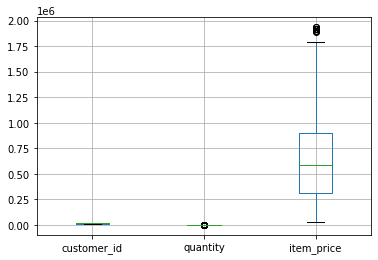

In [22]:
retail_raw['quantity'] = retail_raw['quantity'].fillna(retail_raw['quantity'].mean())
retail_raw['item_price'] = retail_raw['item_price'].fillna(retail_raw['item_price'].mean())

#Mengetahui kolom yang memiliki outliers!
retail_raw.boxplot()
plt.show()

# Deduplikasi Data

Duplikasi Data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya. Tentunya ada data yang duplikasi dalam dataset yang dimiliki. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan Deduplikasi.

Aku tinggal membuang duplikasi data dari dataset retail_raw.

In [23]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (4541, 9)


In [24]:
# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

In [25]:
# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4535, 9)
